In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn import pipeline
from sklearn.metrics import plot_roc_curve

%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('data/Task2data.csv')
y = df.pop('fraud')

In [3]:
import pickle
models = []
for model in os.listdir('models'):
    with open('models/' + model, 'rb') as f:
        models.append(pickle.load(f))

In [4]:
X_main, X_holdout, y_main, y_holdout = train_test_split(df, y, random_state=7, stratify=y)

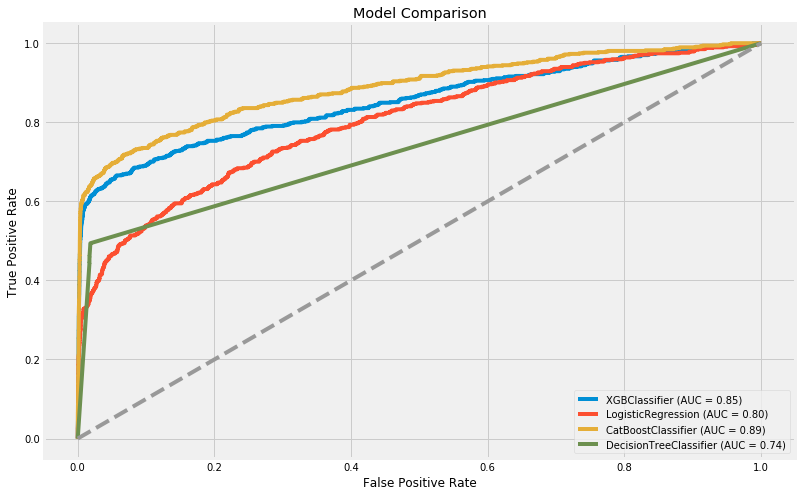

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

scaler = StandardScaler()
X_holdout_scaled = scaler.fit_transform(X_holdout)


for model in models:
    if type(model).__name__ == "LogisticRegression":
        plot_roc_curve(model, X_holdout_scaled, y_holdout.values, ax=ax)
    else:
        plot_roc_curve(model, X_holdout, y_holdout.values, ax=ax)
    
ax.set_title(f'Model Comparison')  
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

In [6]:
model_list = [[type(model).__name__, model] for model in models]
VC = VotingClassifier(model_list, n_jobs=-1, voting='soft')

In [7]:
VC.fit(X_main, y_main)

VotingClassifier(estimators=[['XGBClassifier',
                              XGBClassifier(base_score=0.5, booster='dart',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.05,
                                            max_delta_step=0, max_depth=8,
                                            min_child_weight=1, missing=nan,
                                            n_estimators=1500, n_jobs=-1,
                                            nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                             

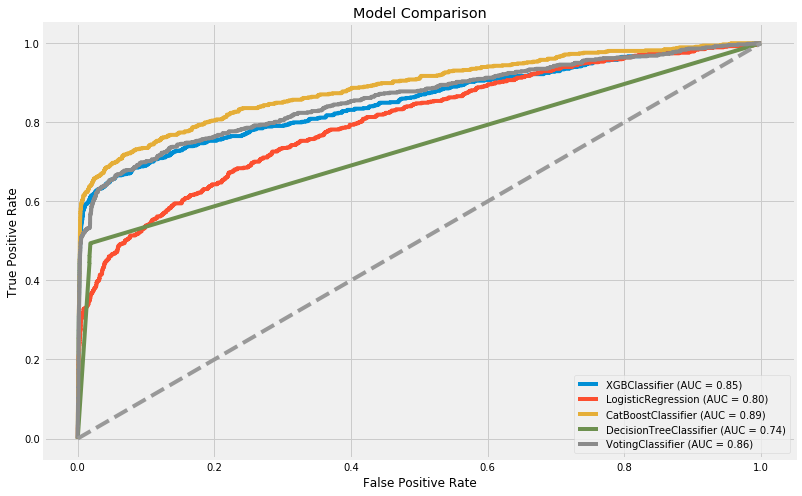

In [10]:
models.append(VC)

fig, ax = plt.subplots(figsize=(12, 8))

for model in models:
    if type(model).__name__ == "LogisticRegression":
        plot_roc_curve(model, X_holdout_scaled, y_holdout.values, ax=ax)
    else:
        plot_roc_curve(model, X_holdout, y_holdout.values, ax=ax)
    
ax.set_title(f'Model Comparison')  
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

In [9]:
with open('models/votingclassifier.pkl', 'wb') as f:
    pickle.dump(VC, f)